In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.style.use('ggplot')
%matplotlib inline


In [94]:
#reading dataset

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [96]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [97]:
#dataset description
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [98]:
df.shape

(768, 9)

In [99]:
#distribution of outcome
df['Outcome'].value_counts()*100/len(df)

,count
Outcome,
0,65.104167
1,34.895833


<Axes: xlabel='Age', ylabel='Count'>

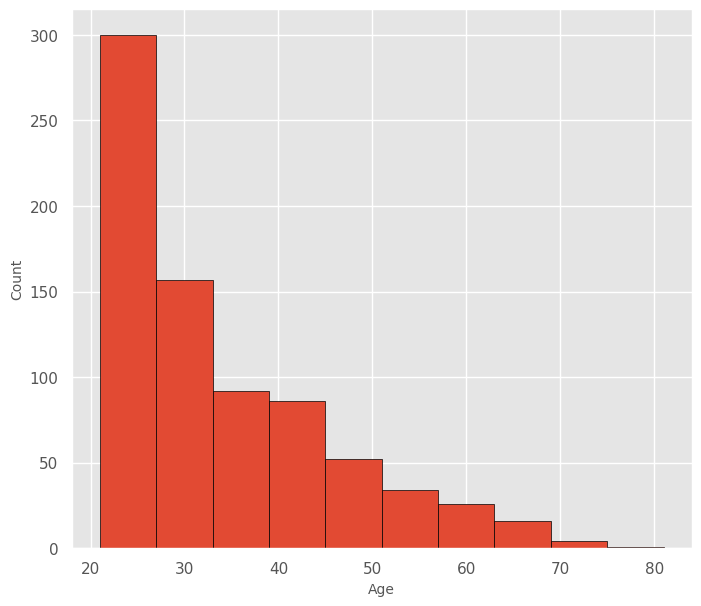

In [100]:
#histogram of Age
plt.figure(figsize=(8,7))
plt.xlabel('Age',fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")


In [101]:
print("Max Age : "+str(df['Age'].max()))
print("Min Age : "+str(df['Age'].min()))

Max Age : 81
Min Age : 21


<Axes: xlabel='Age', ylabel='Density'>

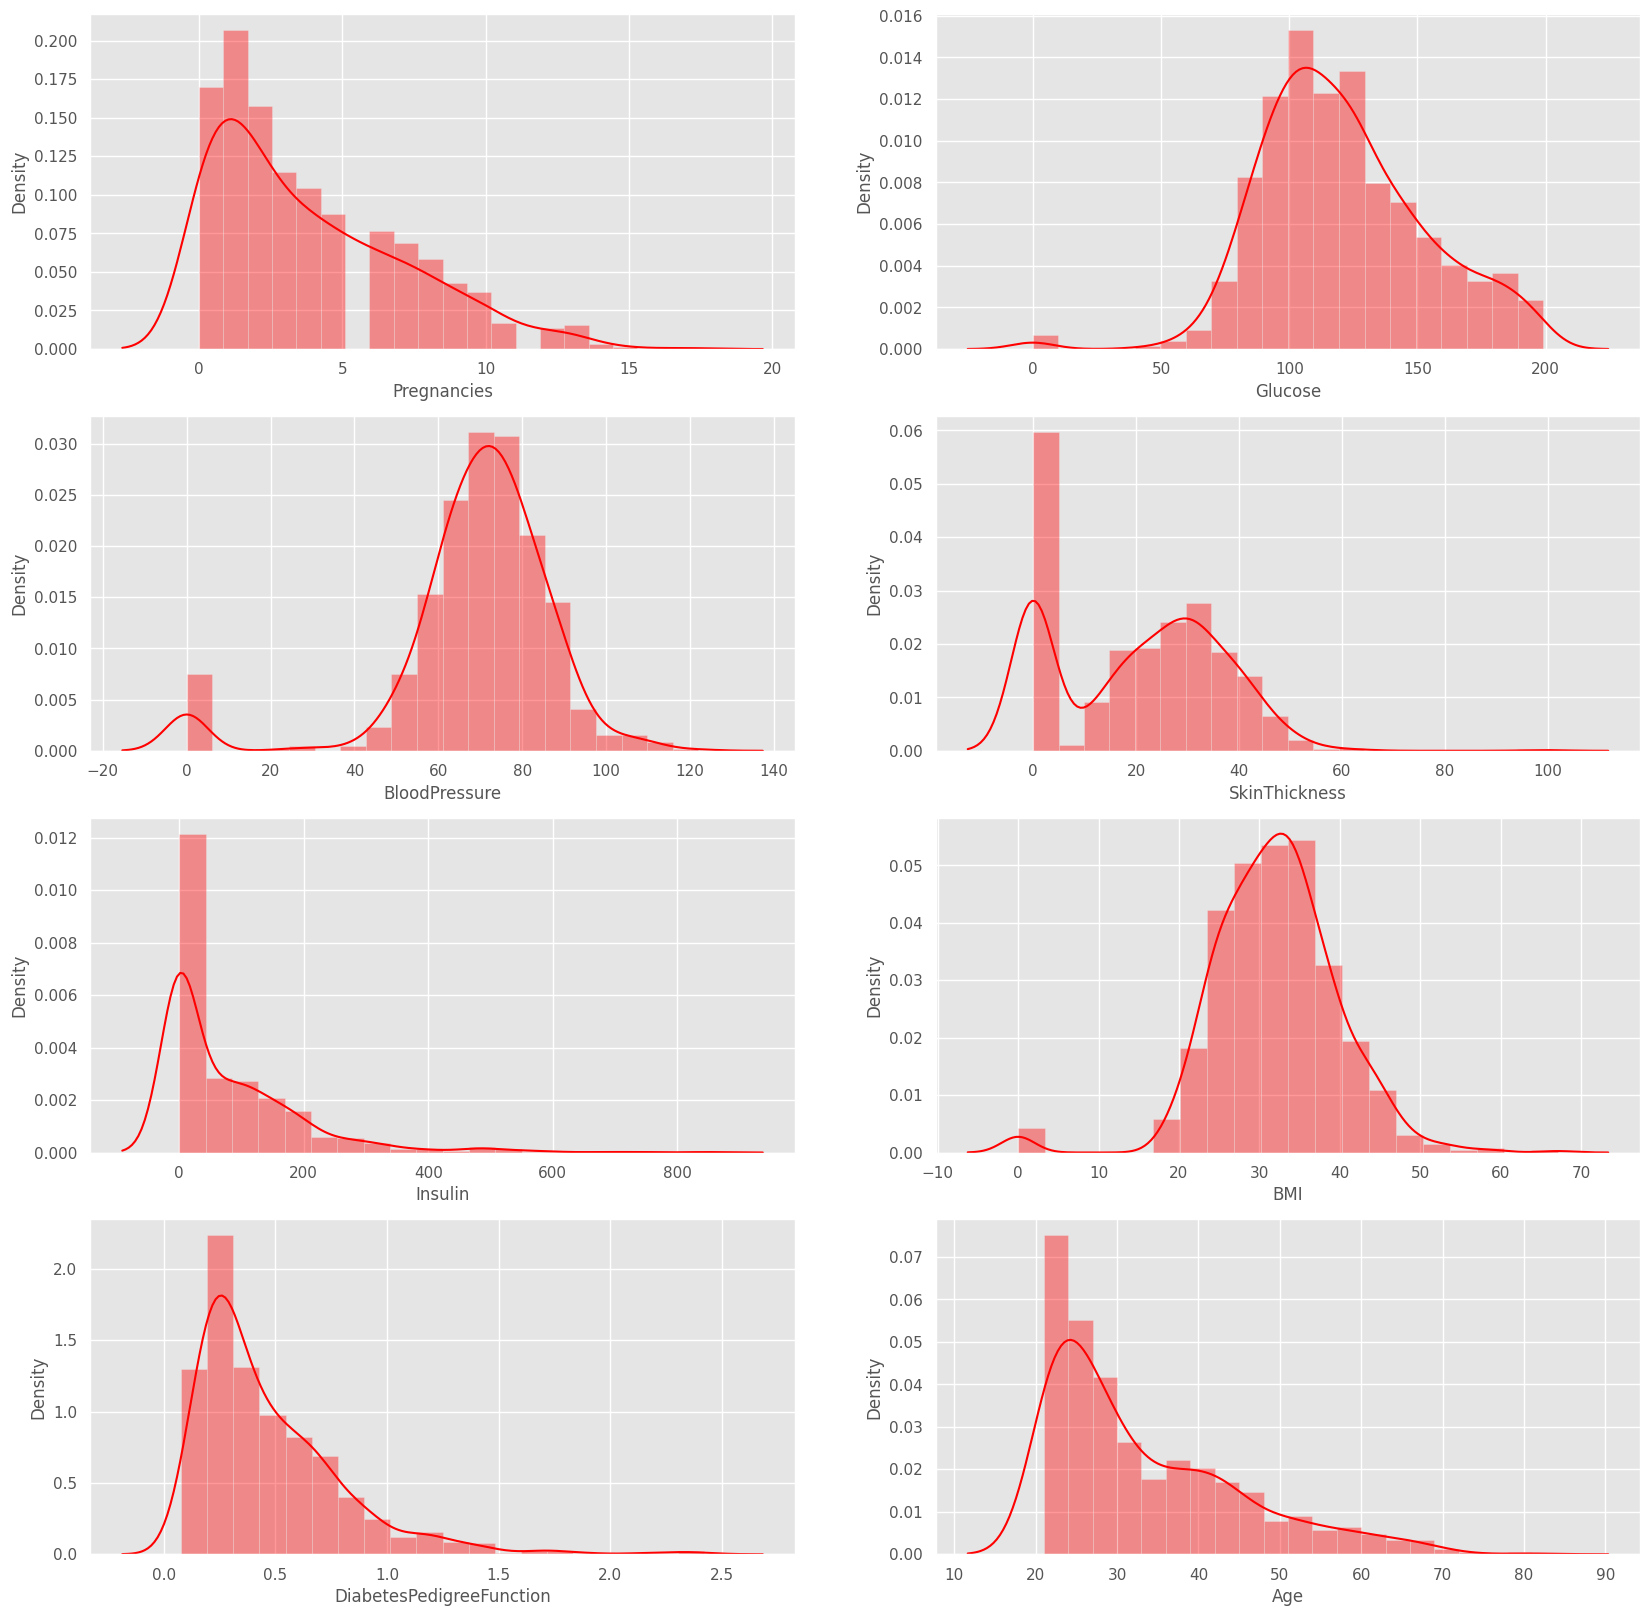

In [102]:
#density graph

fig,ax = plt.subplots(4,2,figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

In [103]:
df.groupby('Outcome').agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [104]:
df.groupby('Outcome').agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [105]:
df.groupby('Outcome').agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [106]:
df.groupby('Outcome').agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [107]:
df.groupby('Outcome').agg({'BloodPressure':'mean'})

,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [108]:
df.groupby('Outcome').agg({'BloodPressure':'max'})

,BloodPressure
Outcome,
0,122
1,114


In [109]:
df.groupby('Outcome').agg({'SkinThickness':'mean'})

,SkinThickness
Outcome,
0,19.664000
1,22.164179


In [110]:
df.groupby('Outcome').agg({'SkinThickness':'max'})

,SkinThickness
Outcome,
0,60
1,99


In [111]:
df.groupby('Outcome').agg({'Insulin':'mean'})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [112]:
df.groupby('Outcome').agg({'Insulin':'max'})

,Insulin
Outcome,
0,744
1,846


In [113]:
df.groupby('Outcome').agg({'BMI':'mean'})

,BMI
Outcome,
0,30.304200
1,35.142537


In [114]:
df.groupby('Outcome').agg({'BMI':'max'})

,BMI
Outcome,
0,57.3
1,67.1


In [115]:
df.groupby('Outcome').agg({'DiabetesPedigreeFunction':'mean'})

,DiabetesPedigreeFunction
Outcome,
0,0.429734
1,0.550500


In [116]:
df.groupby('Outcome').agg({'DiabetesPedigreeFunction':'max'})

,DiabetesPedigreeFunction
Outcome,
0,2.329
1,2.420


In [117]:
df.groupby('Outcome').agg({'Age':'mean'})

,Age
Outcome,
0,31.190000
1,37.067164


In [118]:
df.groupby('Outcome').agg({'Age':'max'})

,Age
Outcome,
0,81
1,70


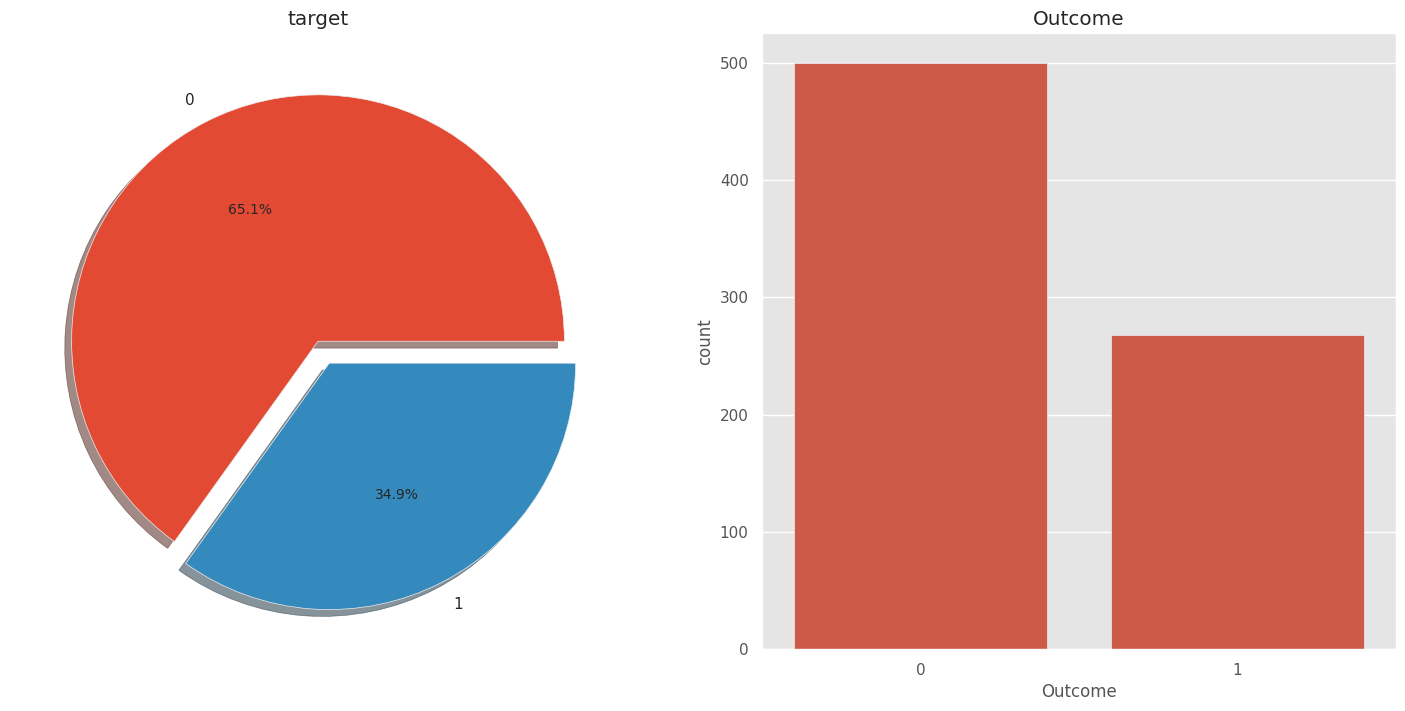

In [119]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [120]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


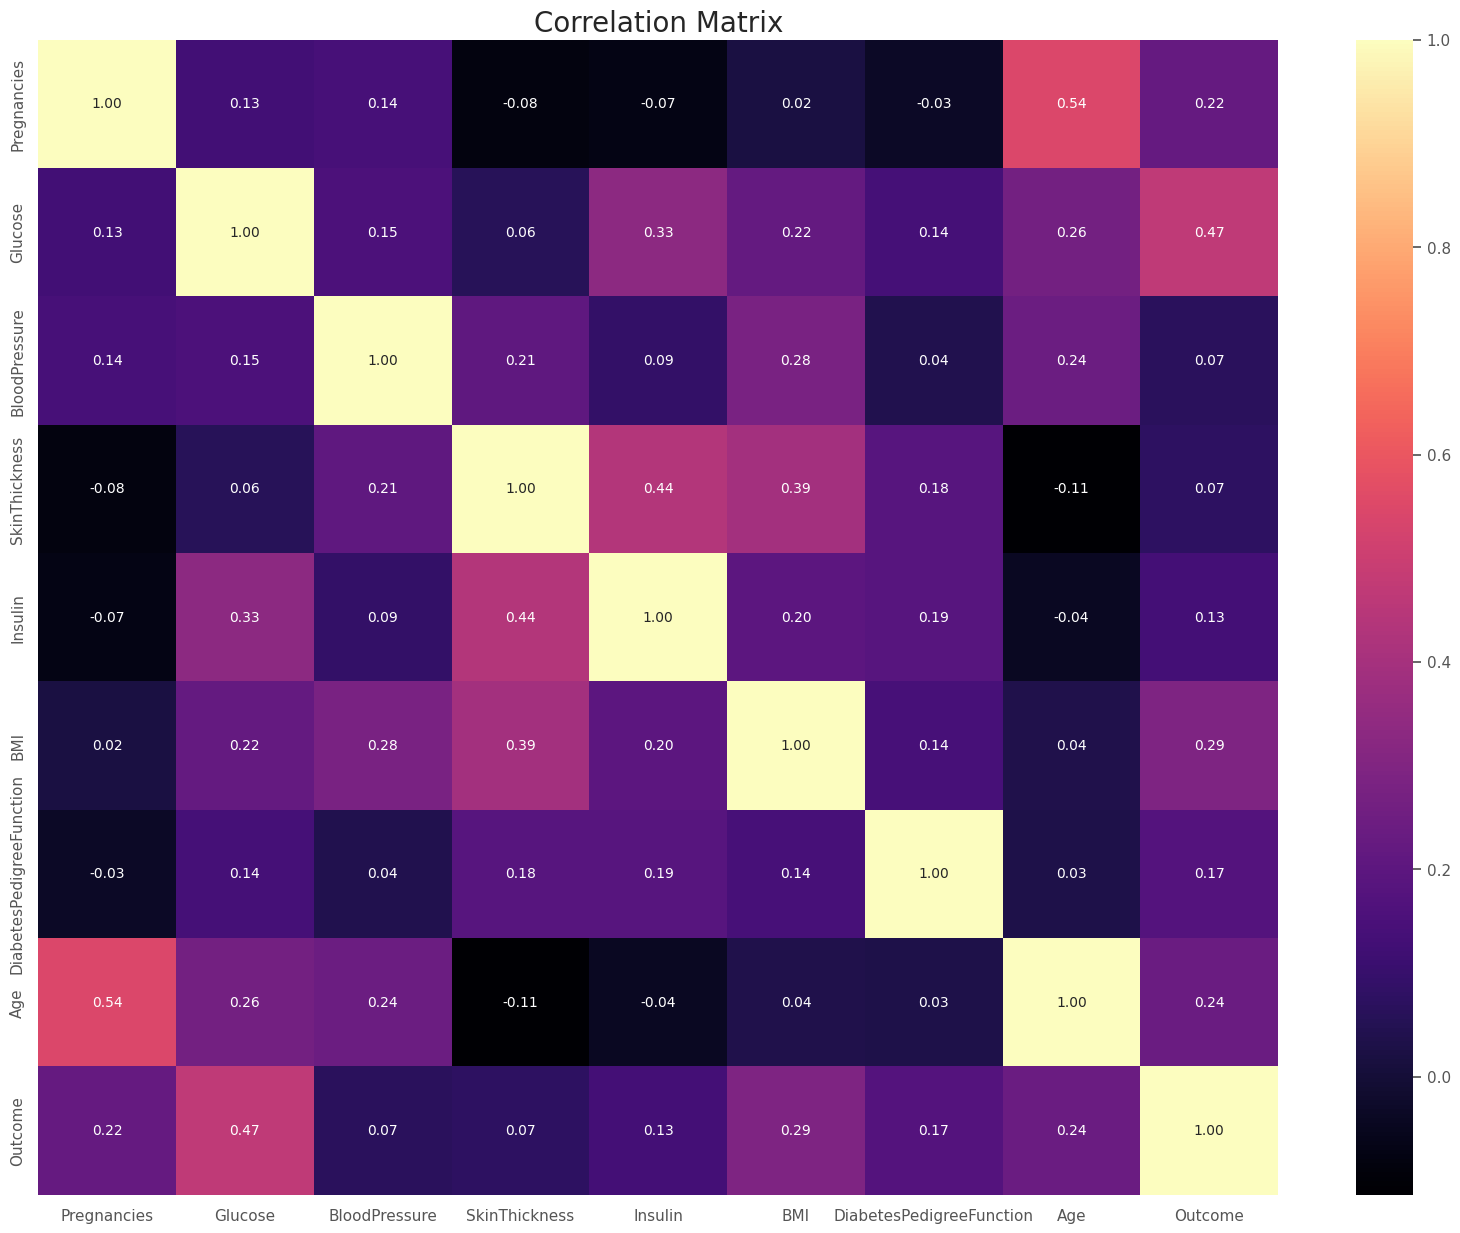

In [121]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(),annot=True,fmt='.2f',ax=ax, cmap='magma')
ax.set_title('Correlation Matrix', fontsize=20)
plt.show()

In [122]:
#Data Preprocessing
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [123]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.nan)

In [124]:
df.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

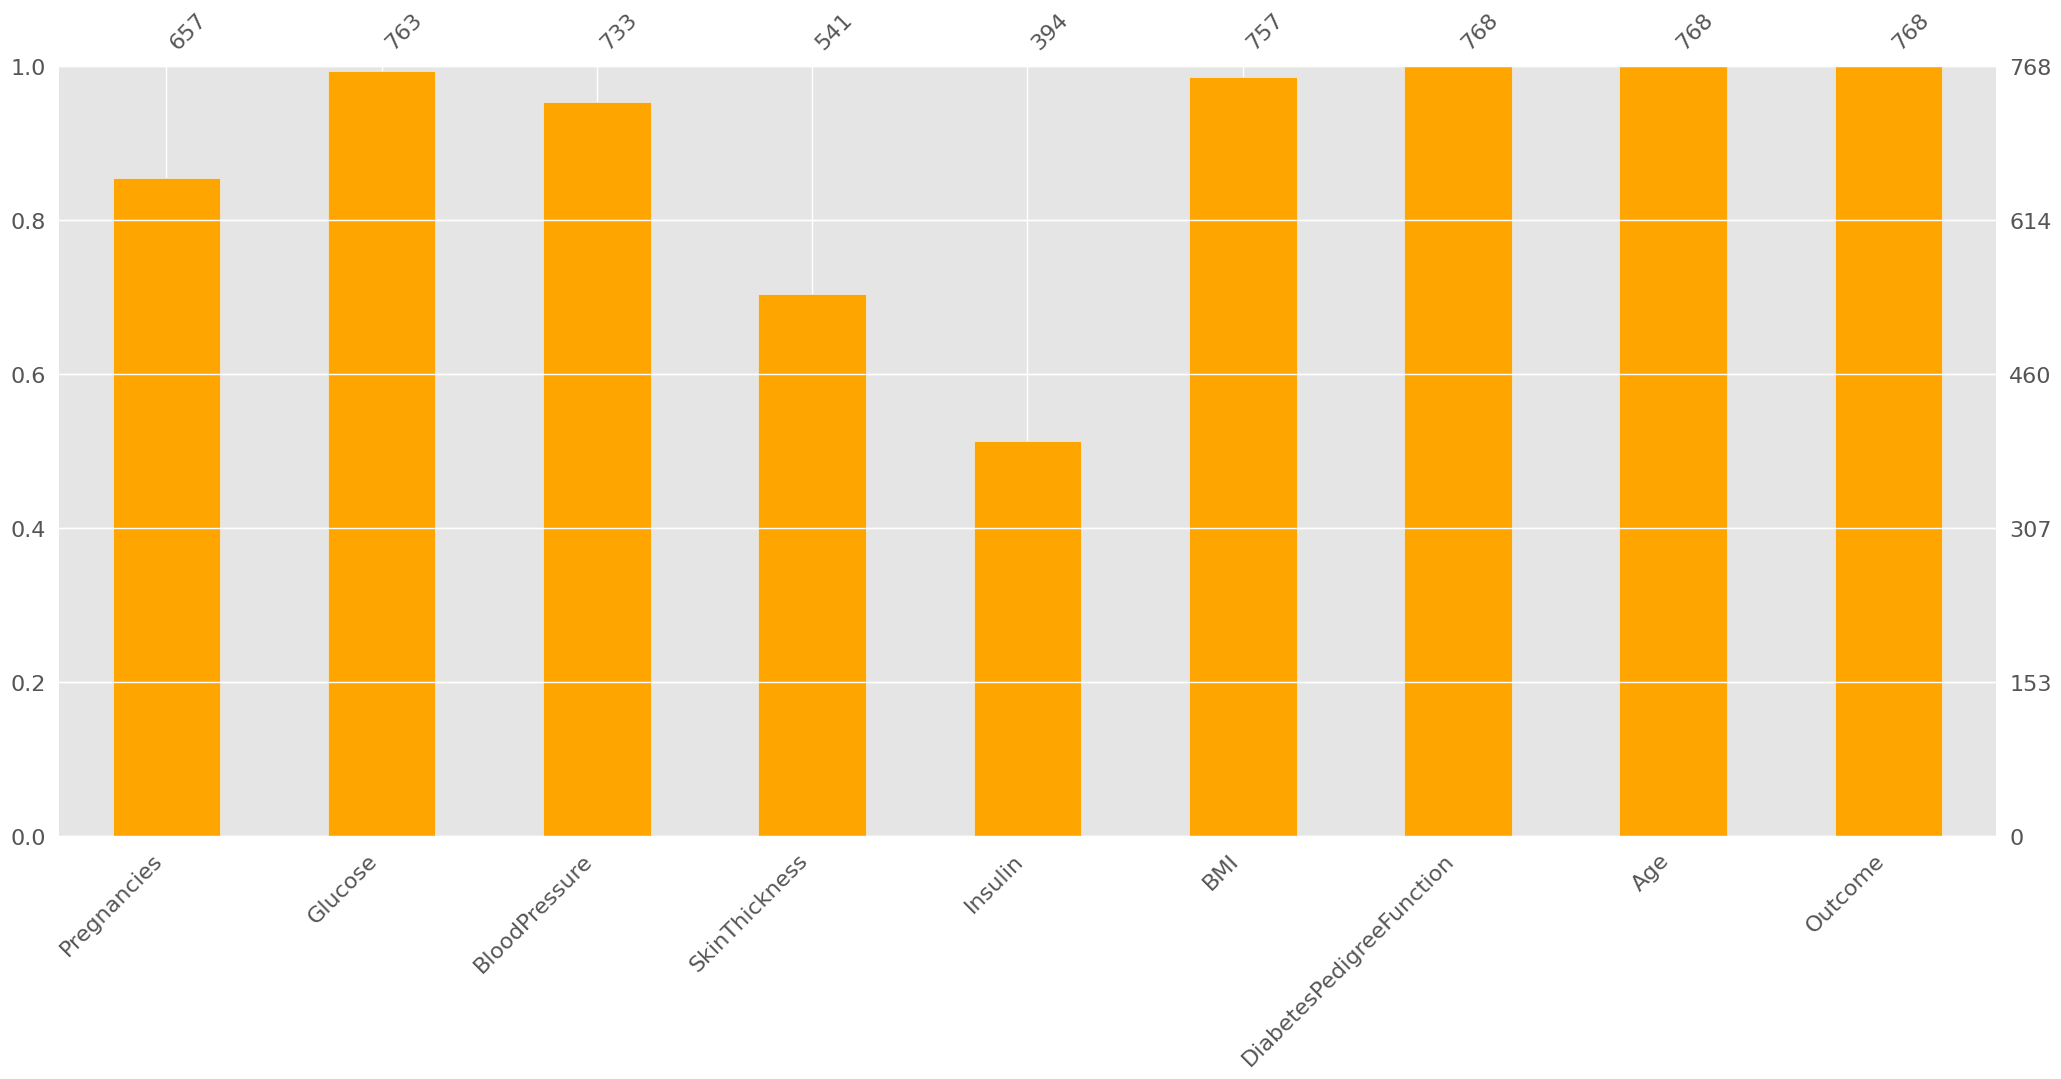

In [125]:
import missingno as msno
msno.bar(df,color="orange")

In [126]:
def median_target(var):
  temp = df[df[var].notnull()]
  temp = temp[[var,'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
  return temp

In [127]:
columns= df.columns
columns = columns.drop('Outcome')
for i in columns:
  median_target(i)
  df.loc[(df['Outcome']==0) & (df[i].isnull()), i] = median_target(i)[i][0]
  df.loc[(df['Outcome']==1) & (df[i].isnull()), i] = median_target(i)[i][1]

In [128]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [129]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [130]:
p=sns.pairplot(df, hue="Outcome")

Output hidden; open in https://colab.research.google.com to view.

In [131]:
#Outlier Detection

for feature in df:
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3-Q1
  lower = Q1-1.5*IQR
  upper = Q3+1.5*IQR
  if df[(df[feature] < lower) | (df[feature] > upper)].any(axis=None):
    print(feature,"yes")
  else:
    print(feature,"no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

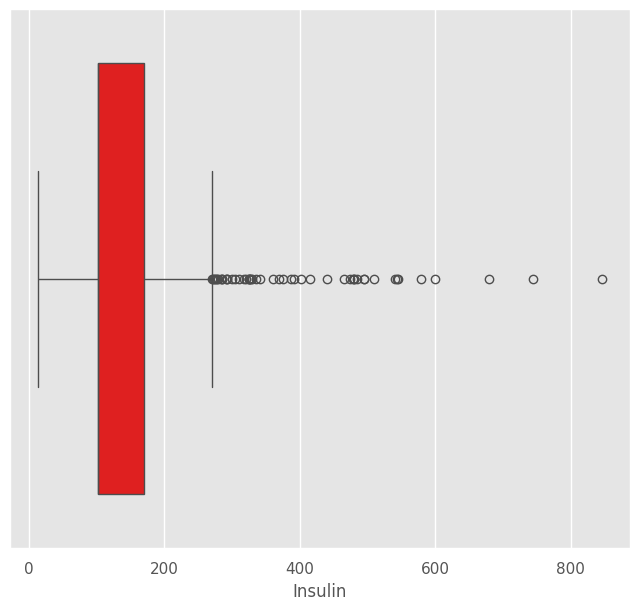

In [132]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df["Insulin"],color="red")

In [133]:
Q1=df.Insulin.quantile(0.25)
Q3=df.Insulin.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df.loc[(df["Insulin"]>upper),"Insulin"]=upper
df.loc[(df["Insulin"]<lower),"Insulin"]=lower

<Axes: xlabel='Insulin'>

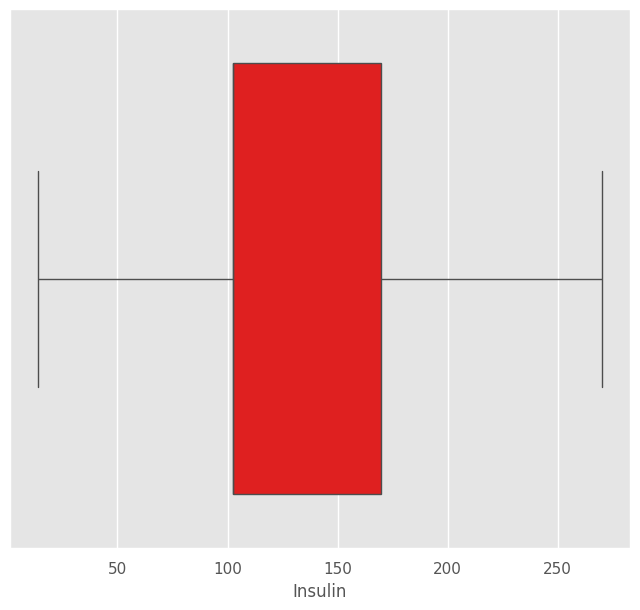

In [134]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df["Insulin"],color="red")

In [135]:
#Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [136]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: xlabel='Pregnancies'>

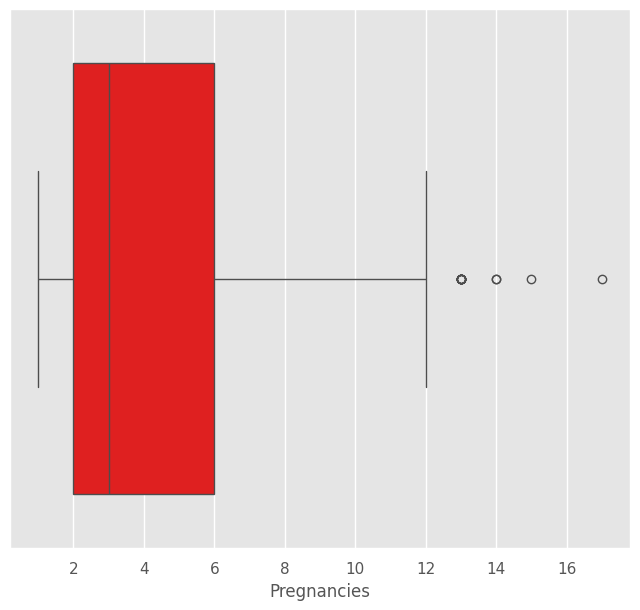

In [137]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df["Pregnancies"],color="red")

In [138]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [139]:
threshold = np.sort(df_scores)[7]
threshold

np.float64(-1.7497423670960557)

In [140]:
outlier = df_scores > threshold
df = df[outlier]

In [141]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [142]:
df.shape

(760, 9)

In [143]:
#Feature Engineering
NewBMI = pd.Series(["Underweight","Normal","Overweight","Obesity 1","Obesity 2","Obesity 3"], dtype = "category")

In [144]:
NewBMI

,0
0,Underweight
1,Normal
2,Overweight
3,Obesity 1
4,Obesity 2
5,Obesity 3


In [145]:
df['NewBMI'] = NewBMI
df.loc[df['BMI'] < 18.5, 'NewBMI'] = NewBMI[0]
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9), 'NewBMI'] = NewBMI[1]
df.loc[(df['BMI'] > 24.9) & (df['BMI'] <= 29.9), 'NewBMI'] = NewBMI[2]
df.loc[(df['BMI'] > 29.9) & (df['BMI'] <= 34.9), 'NewBMI'] = NewBMI[3]
df.loc[(df['BMI'] > 34.9) & (df['BMI'] <= 39.9), 'NewBMI'] = NewBMI[4]
df.loc[df['BMI'] > 39.9, 'NewBMI'] = NewBMI[5]

In [146]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [147]:
# if insulin >=16 & insulin <=166 --> Normal

def set_insulin(row):
  if row['Insulin'] >= 16 and row['Insulin'] <= 166:
    return 'Normal'
  else:
    return 'Abnormal'

In [148]:
df = df.assign(NewInsulinScore = df.apply(set_insulin, axis=1))

In [149]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [150]:
#category based on glucose level
NewGlucose = pd.Series(["Low","Normal","Overweight","Secret","High"], dtype = "category")
df['NewGlucose'] = NewGlucose
df.loc[df['Glucose'] <= 70, 'NewGlucose'] = NewGlucose[0]
df.loc[(df['Glucose'] > 70) & (df['Glucose'] <= 99), 'NewGlucose'] = NewGlucose[1]
df.loc[(df['Glucose'] > 99) & (df['Glucose'] <= 126), 'NewGlucose'] = NewGlucose[2]
df.loc[(df['Glucose'] > 126) & (df['Glucose'] <= 199), 'NewGlucose'] = NewGlucose[3]
df.loc[df['Glucose'] > 199, 'NewGlucose'] = NewGlucose[4]

In [151]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [152]:
#One hot encoding
df= pd.get_dummies(df, columns=['NewBMI','NewGlucose','NewInsulinScore'], drop_first=True)

In [154]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [155]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewInsulinScore_Normal
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,0,0,0,0,0,0,1,0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,0,0,1,0,0,1,0,0,1
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,0,0,0,0,0,0,0,1,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,0,1,0,0,1
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,1,0


In [156]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewGlucose_Low', 'NewGlucose_Normal',
       'NewGlucose_Overweight', 'NewGlucose_Secret', 'NewInsulinScore_Normal'],
      dtype='object')

In [158]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewGlucose_Low', 'NewGlucose_Normal',
       'NewGlucose_Overweight', 'NewGlucose_Secret', 'NewInsulinScore_Normal']]

In [159]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewInsulinScore_Normal
0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,1,0


In [161]:
y = df['Outcome']
x = df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewGlucose_Low', 'NewGlucose_Normal',
       'NewGlucose_Overweight', 'NewGlucose_Secret', 'NewInsulinScore_Normal'], axis=1)

In [162]:
cols = x.columns
index = x.index

In [163]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [166]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x)
x = transformer.transform(x)
x = pd.DataFrame(x, columns=cols, index=index)

In [167]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [168]:
x = pd.concat([x,categorical_df], axis=1)

In [169]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewInsulinScore_Normal
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,1,0,0,0,0,0,0,0,1,0
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,0,0,0,1,0,0,1,0,0,1
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,0,0,0,0,0,0,0,0,1,0
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,0,0,0,1,0,0,1,0,0,1
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,0,0,1,0,0,0,0,0,1,0


In [170]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [171]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [172]:
#ML Algo

In [175]:
# Logistic Regression

In [173]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [174]:
y_pred = log_reg.predict(x_test)

In [177]:
accuracy_score(y_train, log_reg.predict(x_train))

0.8470394736842105

In [218]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(x_test))
log_reg_acc

0.868421052631579

In [181]:
confusion_matrix(y_test, y_pred)

array([[86, 12],
       [ 8, 46]])

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        98
           1       0.79      0.85      0.82        54

    accuracy                           0.87       152
   macro avg       0.85      0.86      0.86       152
weighted avg       0.87      0.87      0.87       152



In [ ]:
#KNN

In [219]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_train, knn.predict(x_train)))
knn_acc = accuracy_score(y_test, knn.predict(x_test))
print(accuracy_score(y_test, knn.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.868421052631579
0.868421052631579
[[89  9]
 [11 43]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.83      0.80      0.81        54

    accuracy                           0.87       152
   macro avg       0.86      0.85      0.86       152
weighted avg       0.87      0.87      0.87       152



In [187]:
#SVM
svc = SVC(probability=True)
parameter = {
    "gamma": [0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05, 0.1, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [188]:
#best_parameter
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [189]:
grid_search.best_score_

np.float64(0.8651131283023981)

In [220]:
svc = SVC(C=10, gamma = 0.01, probability=True )
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(accuracy_score(y_train, svc.predict(x_train)))
svc_acc = accuracy_score(y_test, svc.predict(x_test))
print(accuracy_score(y_test, svc.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8898026315789473
0.881578947368421
[[89  9]
 [ 9 45]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        98
           1       0.83      0.83      0.83        54

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



In [192]:
#Decision Tree

In [222]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
print(accuracy_score(y_train, DT.predict(x_train)))
print(accuracy_score(y_test, DT.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.868421052631579
[[85 13]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        98
           1       0.78      0.87      0.82        54

    accuracy                           0.87       152
   macro avg       0.85      0.87      0.86       152
weighted avg       0.87      0.87      0.87       152



In [207]:
#hyperparameter tuning of dt
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [3,4,5,6,7,10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1,2,3,5,7],
    'min_samples_split' : [1,2,3,5,7],
    'max_features' : ['auto', 'sqrt', 'log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose=1)
grid_search_dt.fit(x_train, y_train)

Fitting 50 folds for each of 1800 candidates, totalling 90000 fits


GridSearchCV(cv=50,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              max_features='sqrt',
                                              min_samples_leaf=3,
                                              min_samples_split=7),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [208]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'splitter': 'best'}

In [209]:
grid_search_dt.best_score_

np.float64(0.8646153846153846)

In [224]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(x_test)
print(accuracy_score(y_train, DT.predict(x_train)))
DT_acc = accuracy_score(y_test, DT.predict(x_test))
print(accuracy_score(y_test, DT.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8601973684210527
0.8552631578947368
[[89  9]
 [13 41]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        98
           1       0.82      0.76      0.79        54

    accuracy                           0.86       152
   macro avg       0.85      0.83      0.84       152
weighted avg       0.85      0.86      0.85       152



In [ ]:
#Gradient Boosting Classifier

In [212]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'n_estimators': [100,150,180,200]
}
grid_search_gbc = GridSearchCV(gbc, parameters, cv=10, n_jobs=-1, verbose=1)
grid_search_gbc.fit(x_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [213]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [214]:
grid_search_gbc.best_score_

np.float64(0.8863934426229507)

In [215]:
gbc = GradientBoostingClassifier(learning_rate=0.1, loss='exponential', n_estimators=100)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)

In [225]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(x_test)
print(accuracy_score(y_train, gbc.predict(x_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(x_test))
print(accuracy_score(y_test, gbc.predict(x_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9720394736842105
0.9144736842105263
[[92  6]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        98
           1       0.89      0.87      0.88        54

    accuracy                           0.91       152
   macro avg       0.91      0.90      0.91       152
weighted avg       0.91      0.91      0.91       152



In [226]:
#Model Comparison
models = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Gradient Boosting Classifier'],
                       'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(DT_acc,4), 100*round(gbc_acc,4)]
                       })
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Gradient Boosting Classifier,91.45
2,SVM,88.16
0,Logistic Regression,86.84
1,KNN,86.84
3,Decision Tree,85.53


In [227]:
import pickle
model = gbc_acc
pickle.dump(model, open('Diabalyze', 'wb'))

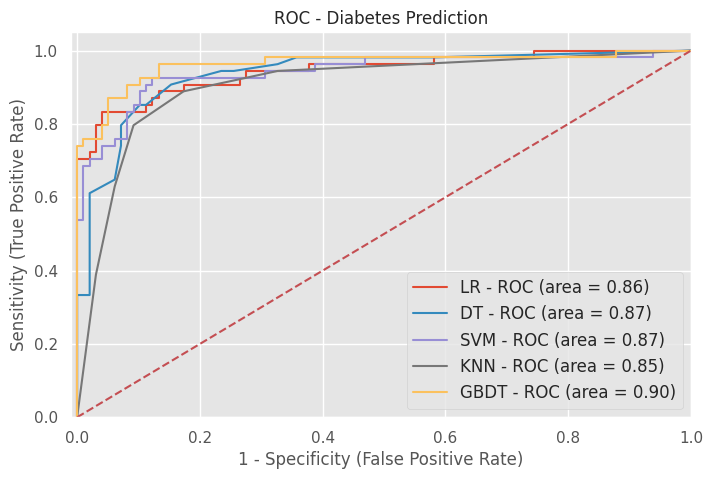

In [229]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},

{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model']
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[86.83999999999999, 85.53, 88.16000000000001, 86.83999999999999, 91.45]
[np.float64(86.47), np.float64(84.3), np.float64(87.07000000000001), np.float64(85.22), np.float64(90.46)]


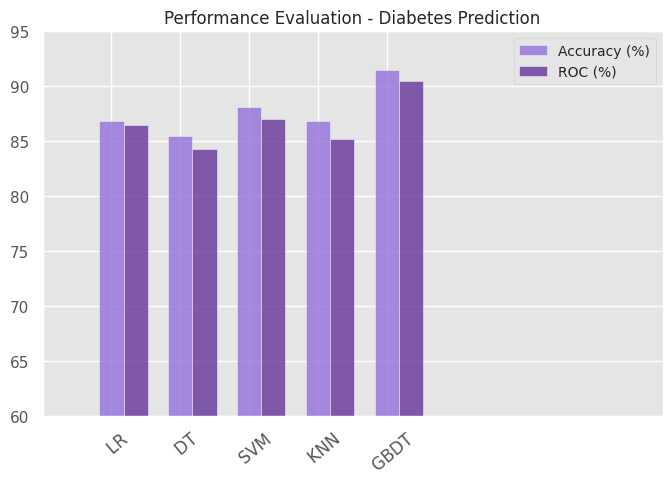

In [232]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(DT_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(gbc_acc,4)]


for m in models:
    model = m['model']
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 5
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN',  '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()